In [ ]:
"""
Python可视化20|Seaborn散点图&&折线图
原创 pythonic生物人 pythonic生物人 2020-08-16 00:00

本文详细介绍使用函数relplot绘制散点图和折线图。
Seaborn中有两种方式绘制散点图和折线图

使用函数relplot，只需要切换relplot中的kind参数：kind="scatter"（默认，散点图）；kind="line"（折线图）
使用scatterplot函数绘制散点图、使用lineplot函数绘制折线图

本文详细介绍第一种方式 ，使用函数relplot绘制散点图和折线图。
seaborn.relplot是一种figure-level层面的函数（可以简单理解为可轻松绘制多个子图），
另外一个是axes面的函数（每一个子图）。

1、绘图数据准备

2、relplot绘制散点图：kind="scatter"
不分类散点图 
分类散点图 
点大小随数值大小变化 
点大小&&颜色随数值大小变化 
图例设置
点marker设置 
按变量分图绘图 

3、relplot绘制折线图：kind="line" 
折线添加置信区间 
关闭置信区间 
分类绘制折线图 
添加误差棒 
分图绘制折线图
"""

In [3]:
"""
1、绘图数据准备
还是使用鸢尾花iris数据集：Python可视化|matplotlib10-绘制散点图scatter
"""
#导入本帖要用到的库，声明如下：
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import palettable
from pandas import Series,DataFrame
from sklearn import datasets
import seaborn as sns

#导入鸢尾花iris数据集（方法一）
#该方法更有助于理解数据集
iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])

#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')

pd_iris.head()
#导入鸢尾花iris数据集（方法二）
#该方法有时候会卡巴斯基，所以弃而不用 其实是可以把数据下载到本地，在load_dataset方法中指定data_home来从本地获取数据的
#sns.load_dataset("iris",data_home="./seaborn-data",cache=True)
#import seaborn as sns
#iris_sns = sns.load_dataset("iris")

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


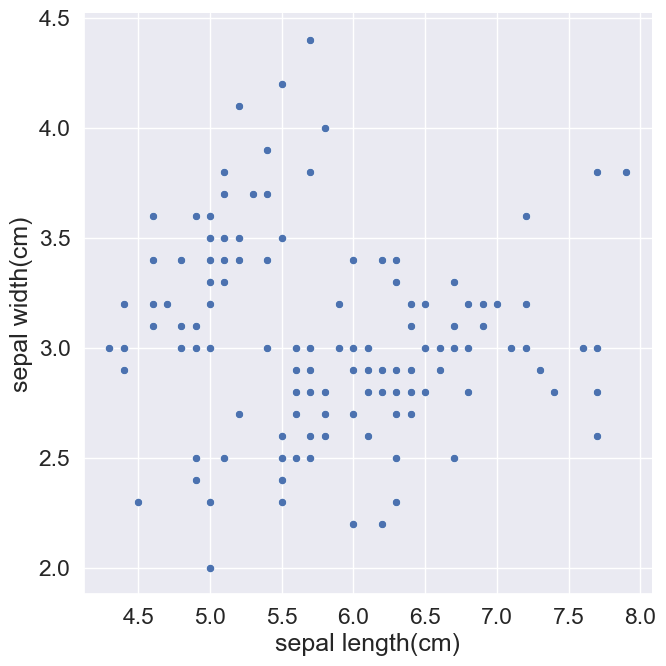

In [6]:
"""
2、 relplot绘制散点图：kind="scatter"
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, 
row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, 
size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', 
height=5, aspect=1, facet_kws=None, **kwargs)

散点图更多特异参数参考：

seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, 
hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, 
x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', 
x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)

不分类散点图
"""
import warnings
warnings.filterwarnings("ignore") #忽略warnings

sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,#绘图数据
            height=7,#图高
            palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors[0],#palettable调色盘
           )
sns.set(style="darkgrid",font_scale=1.5)#设置绘图风格

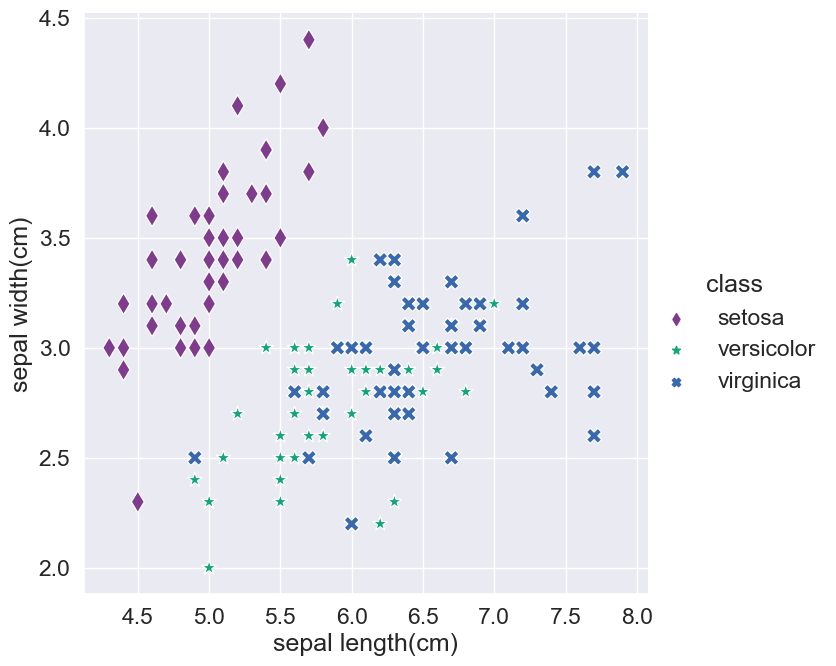

In [7]:
"""
分类散点图
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors[:3],
            height=7,
            hue='class',#添加分类变量
            style='class',#添加不同类变量按照不同marker显示
            markers=['d','*','X'],#自定义marker形状，参考
            **dict(s=120),#传入词典，调用Matplotlib中的参数            
           )
sns.set(style="darkgrid",font_scale=1.5)

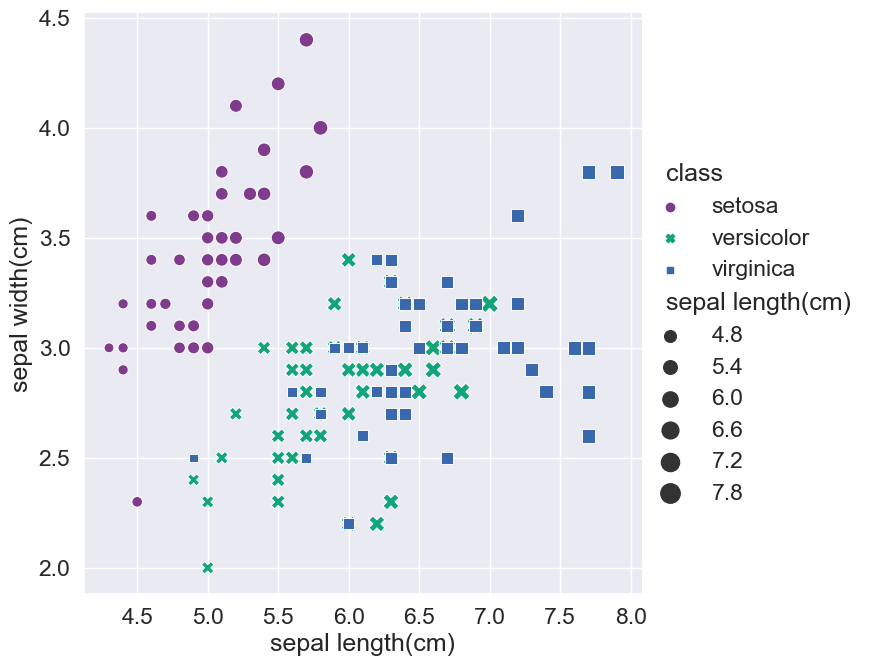

In [8]:
"""
点大小随数值大小变化
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors[:3],
            height=7,
            hue='class',
            style='class',
            size='sepal length(cm)',#按照sepal length(cm)的长度显示marker的大小，越长点越大
            sizes=(50,200)#marker大小阈值
           )
sns.set(style="darkgrid",font_scale=1.5)

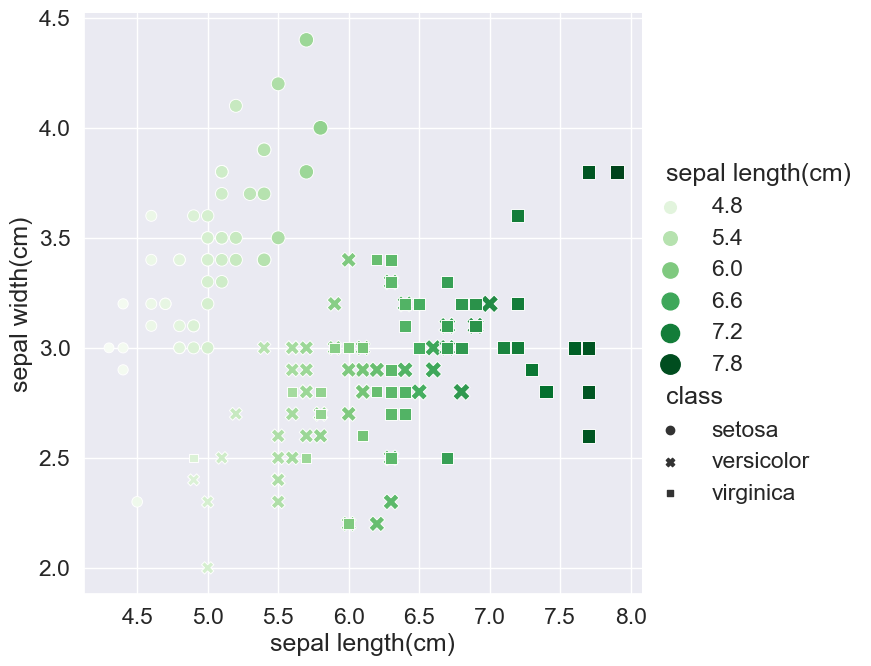

In [9]:
"""
点大小&&颜色随数值大小变化
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette='Greens',
            height=7,
            style='class',
            hue='sepal length(cm)',#按照sepal length(cm)的长度显示marker的大小及颜色深浅，越长点越大，颜色越深
            size='sepal length(cm)',
            sizes=(50, 200),
            
           )
sns.set(style="darkgrid",font_scale=1.5)

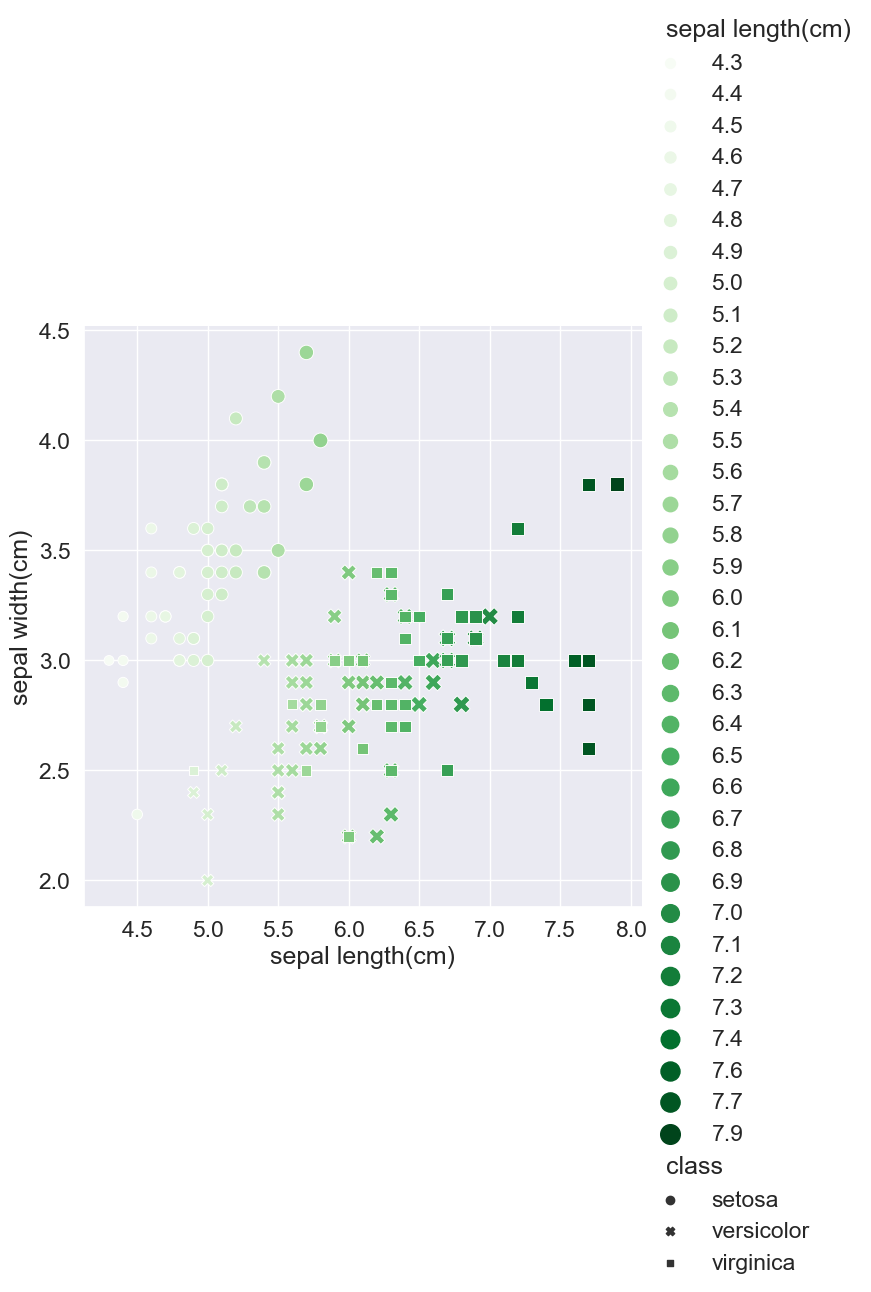

In [10]:
"""
图例设置
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette='Greens',
            height=7,
            style='class',
            hue='sepal length(cm)',#按照sepal length(cm)的长度显示marker的大小及颜色深浅，越长点越大，颜色越深
            size='sepal length(cm)',
            sizes=(50, 200),
            legend='full',#图例设置，            
           )
sns.set(style="darkgrid",font_scale=1.2)

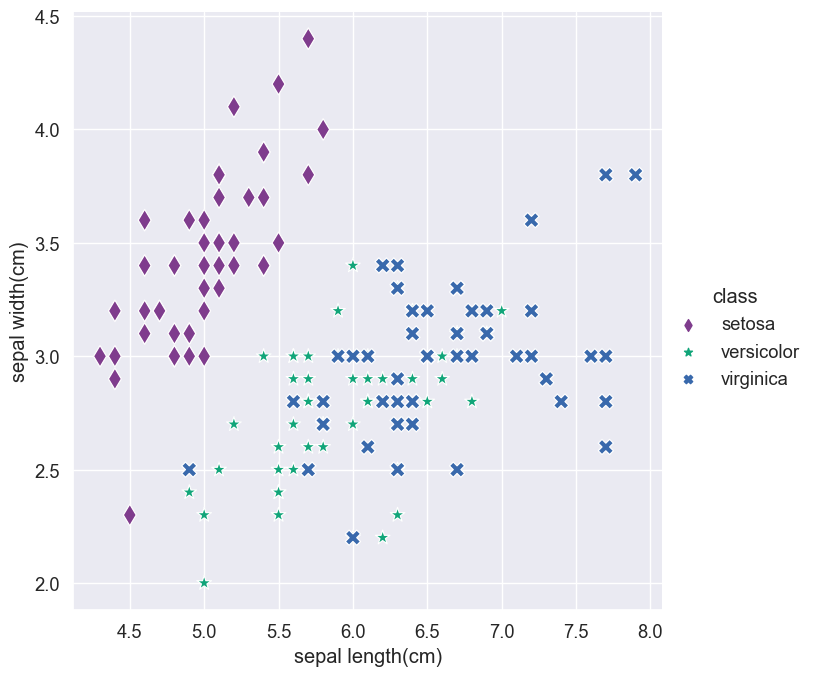

In [11]:
"""
点marker设置
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors[:3],
            height=7,
            hue='class',
            style='class',#添加不同类变量按照不同marker显示
            markers=['d','*','X'],#自定义marker形状，参考
            **dict(s=120),#传入词典，调用Matplotlib中的参数 ，更多可见：matplotlib.axes.Axes.plot() 
            legend='full'
            
           )
sns.set(style="darkgrid",font_scale=1.2)

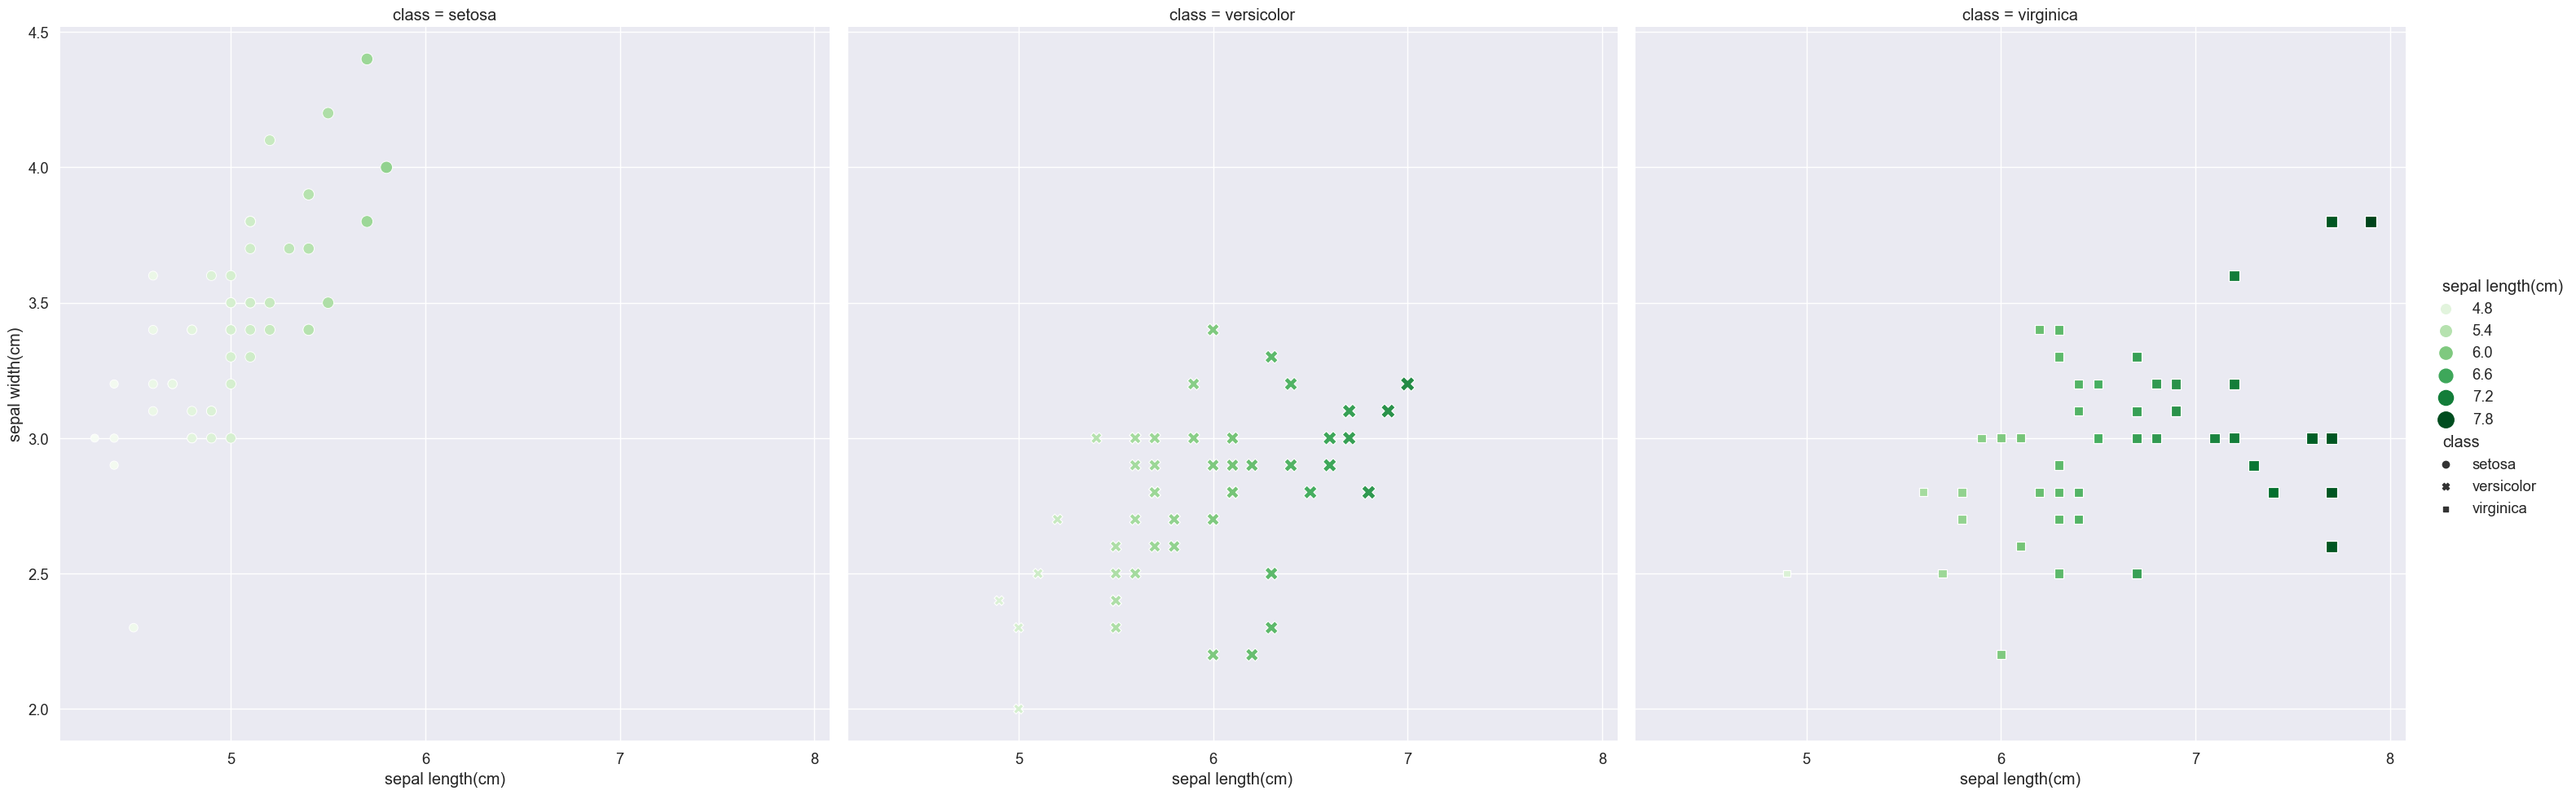

In [12]:
"""
按变量分图绘图
"""
g=sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            palette='Greens',
            height=10,
            style='class',
            hue='sepal length(cm)',
            size='sepal length(cm)',
            sizes=(50, 200), 
            col='class',#按变量分图绘制散点图
           )

sns.set(style='darkgrid', font='sans-serif', font_scale=4,)#设置text字体、大小

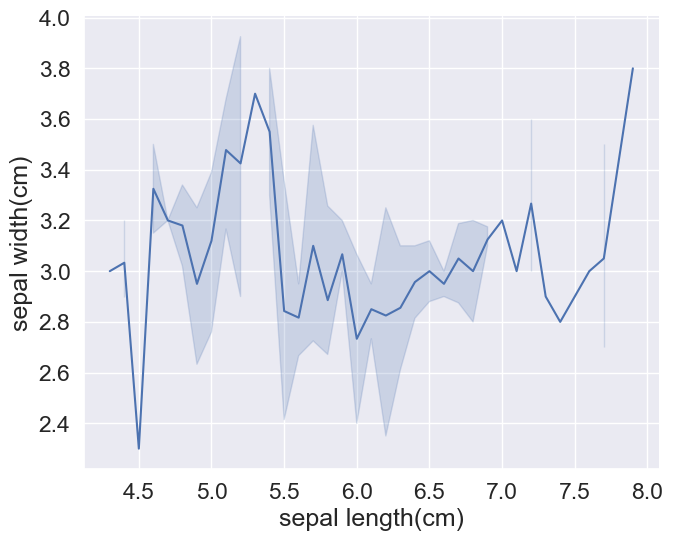

In [14]:
"""
3、 relplot绘制折线图：kind="line"
折线图更多特异参数参考：

seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, 
sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', 
ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)

折线添加置信区间
"""
g=sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,#绘图数据
            kind='line',#当前绘制折线图，默认为scatter
            ci=95,#折线图上下阴影按照每个点的95%置信区间计算，默认为95，可选int or 'sd'or None,
           )
g.fig.set_size_inches(8,6)#seaborn图形大小
sns.set(style="darkgrid",font_scale=1.0)#文字大小

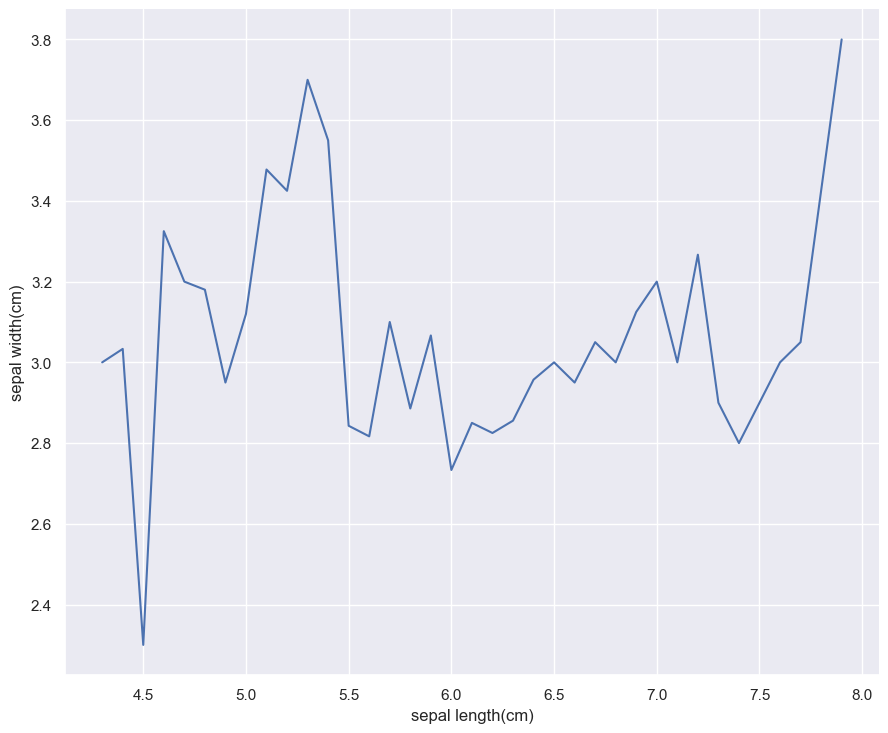

In [15]:
"""
关闭置信区间
"""
g=sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            kind='line',
            ci=None,#关闭置信区间
           )
g.fig.set_size_inches(10,8)
sns.set(style="darkgrid",font_scale=1.5)

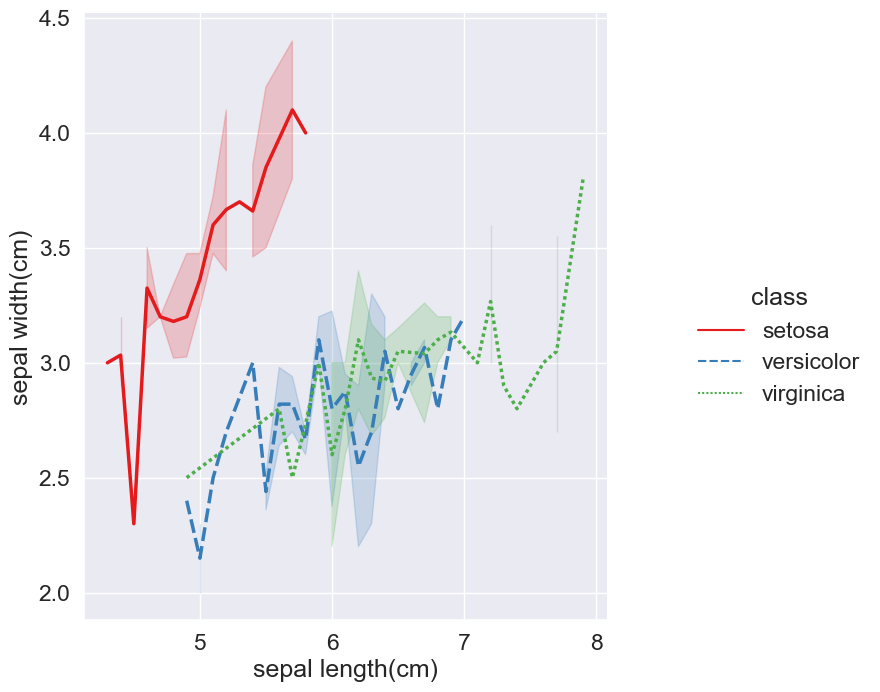

In [16]:
"""
分类绘制折线图
"""
g=sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            kind='line',
            ci=95,
            hue='class',#按类绘图
            palette='Set1',
            style='class',#不同类不同线型
            **dict(linewidth=2.5,)
            
           )
g.fig.set_size_inches(10,8)
sns.set(style="darkgrid",font_scale=1.5)

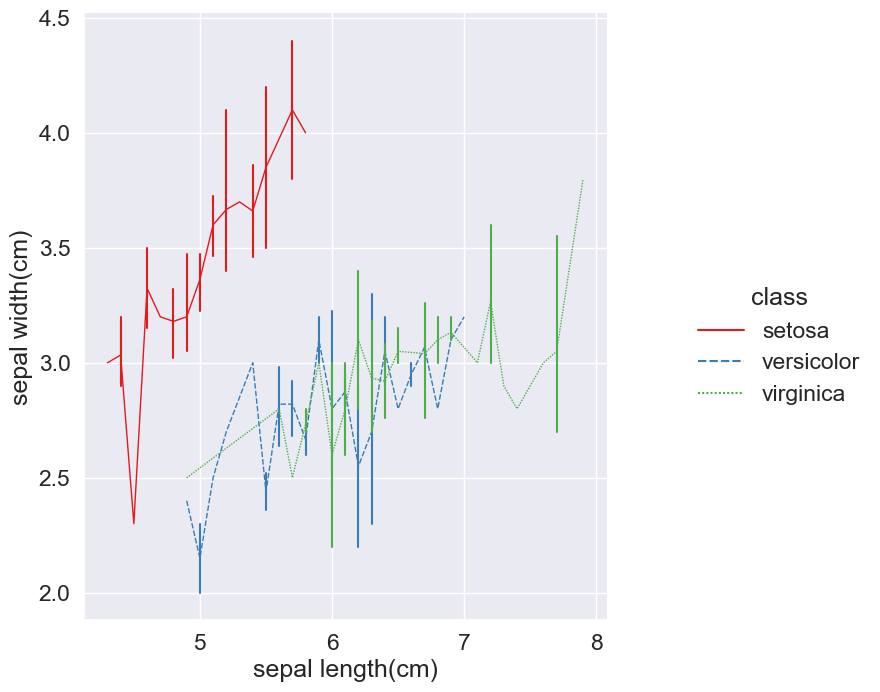

In [18]:
"""
添加误差棒
"""
g=sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            kind='line',
            ci=95,
            hue='class', 
            palette='Set1',
            style='class',
            #**dict(linewidth=2.5,),
            err_style='bars',#添加误差线，可选“band” or “bars”,
            lw=1,
            
           )
g.fig.set_size_inches(10,8)
sns.set(style="darkgrid",font_scale=1.5)

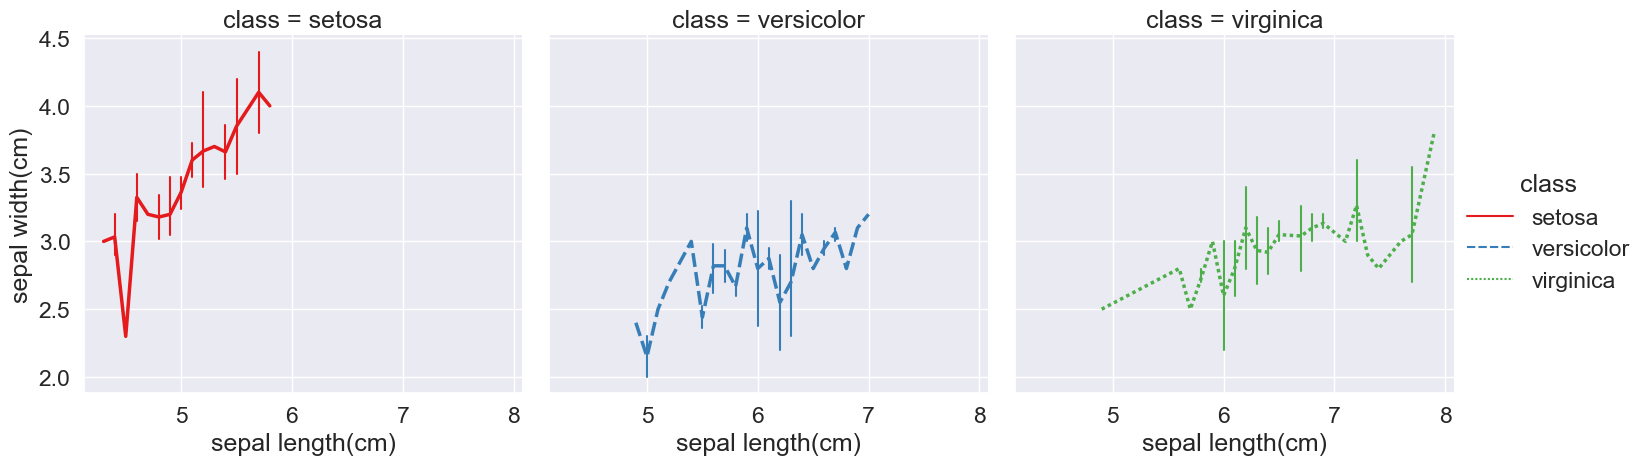

In [19]:
"""
分图绘制折线图
"""
sns.relplot(x='sepal length(cm)',y='sepal width(cm)',data=pd_iris,
            kind='line',
            ci=95,
            hue='class', 
            palette='Set1',
            style='class',
            **dict(linewidth=2.5,),
            err_style='bars',
            col='class',#分开画            
           )
sns.set(style='darkgrid',font_scale=1.5)

In [ ]:
"""
参考资料：
http://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot
http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
http://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
同系列文章
Python可视化18|seborn-seaborn调色盘（六）
Python可视化19|seborn图形外观设置
"""